### Locally Weighted Approximation for Convergence of DQN

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import ceil
from scipy import linalg
from IPython.display import Image
from IPython.display import display
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
#Defining the bell shaped kernel function - used for plotting later on
def kernel_function(xi,x0,tau= .005): 
    return np.exp( - (xi - x0)**2/(2*tau)   )

def lowess_bell_shape_kern(x, y, tau = .005):
    """lowess_bell_shape_kern(x, y, tau = .005) -> yest
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve. 
    """
    m = len(x)
    yest = np.zeros(m)

    #Initializing all weights from the bell shape kernel function    
    w = np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(m)])     
    
    #Looping through all x-points
    for i in range(m):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = linalg.solve(A, b)
        yest[i] = theta[0] + theta[1] * x[i] 

    return yest

In [3]:
converging_iters = {
    4: [92, 8, 36, 8, 4, 16, 44, 4, 16, 20, 8, 4, 12, 12, 4, 4, 4, 4, 12, 8, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 8, 8, 8, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 12, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 20, 8, 8, 4, 4, 4, 8, 4, 4, 4, 8, 4, 4, 4, 4, 4, 12, 8, 8, 4, 4, 4, 4],
    5: [55, 15, 480, 15, 10, 5, 5, 15, 5, 5, 5, 10, 5, 10, 5, 5, 5, 15, 5, 5, 5, 5, 10, 10, 5, 20, 15, 10, 5, 5, 5, 5, 5, 5, 10, 10, 5, 10, 5, 10, 10, 5, 10, 5, 5, 10, 5, 5, 5, 5, 5, 10, 5, 15, 5, 15, 5, 5, 5, 5, 10, 5, 5, 5, 5, 10, 5, 5, 5, 10, 5, 5, 5, 5, 5, 15, 5, 15, 5, 5, 5, 5, 5, 5, 15, 5, 5, 10, 5, 5, 5, 10, 5, 5, 5, 5, 5, 5, 5, 5],
    6: [144, 7068, 1278, 1842, 894, 948, 48, 12, 78, 12, 60, 12, 12, 6, 6, 18, 24, 24, 36, 18, 30, 6, 30, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 18, 6, 6, 6, 6, 6, 6, 6, 18, 6, 6, 30, 6, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 18, 6, 12, 6, 6, 18, 12, 6, 6, 6, 6, 12, 6, 12, 6, 6, 6, 42, 12, 6, 30, 6, 6, 6, 48, 6, 72, 6, 6, 6, 6, 6, 12, 6, 6, 6, 6],
    7: [16737, 189, 5110, 847, 357, 203, 35, 14, 77, 105, 126, 105, 77, 224, 49, 21, 56, 14, 7, 63, 7, 7, 7, 7, 28, 7, 84, 70, 7, 21, 70, 133, 56, 14, 14, 35, 7, 49, 7, 42, 7, 7, 28, 7, 7, 7, 21, 7, 42, 14, 7, 7, 21, 7, 7, 7, 7, 14, 35, 14, 14, 7, 7, 7, 21, 49, 7, 14, 14, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 14, 14, 7, 7, 7, 7, 21, 7, 14, 7, 28, 7, 14, 14, 7, 14, 14, 14, 7, 7, 7]
}

# for i in range(4,8):
#     df = pd.read_csv('saved/'+str(i)+'.csv')
#     converging_iters[i] = list(df['iterations'])


In [4]:
lwr_approximations = {}
x = np.array([i for i in range(1,101)])
tau = 1.5
for i in converging_iters.keys():
    lwr_approximations[i] = lowess_bell_shape_kern(x, np.array(converging_iters[i]),tau)

In [5]:
def plot_pred(lwr_approximations, converging_iters, n):
    
    x = np.linspace(1, 100, num=100)
    plt.figure(figsize=(10,5))
    actual = converging_iters[n]
    pred = lwr_approximations[n]
    # LWR = Locally weighted regression
    plt.title('Curve fit for n = '+str(n)+' using LWR')
    plt.scatter(x,actual,c = 'c',label = "actual")
    plt.plot(x,pred,'r',label = "fitted")
    plt.legend(loc="upper right")
    plt.xlabel('Episode number')
    plt.ylabel('Iterations')
    plt.show()

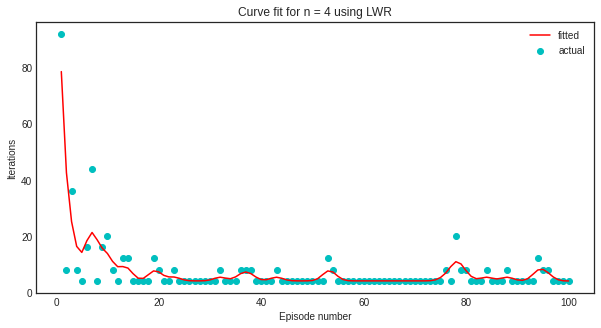

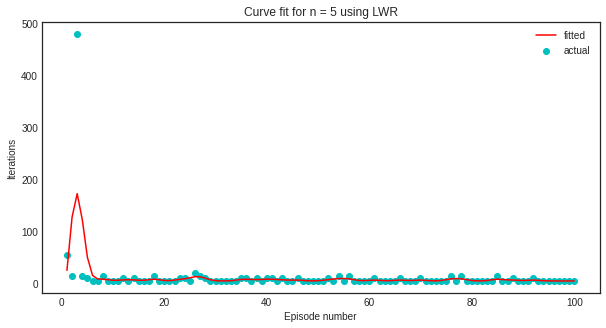

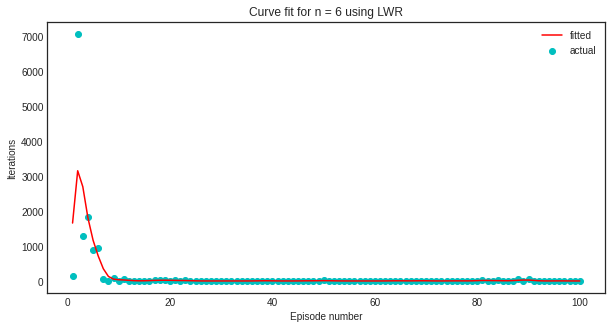

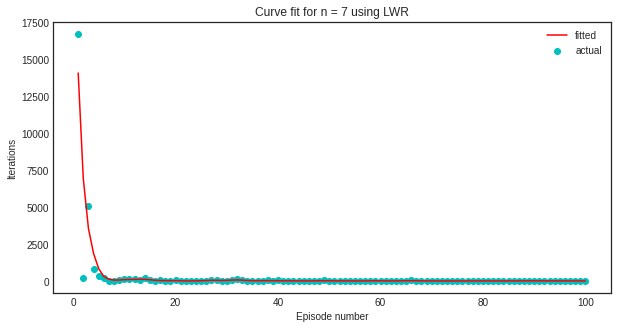

In [6]:
plot_pred(lwr_approximations, converging_iters, 4)
plot_pred(lwr_approximations, converging_iters, 5)
plot_pred(lwr_approximations, converging_iters, 6)
plot_pred(lwr_approximations, converging_iters, 7)

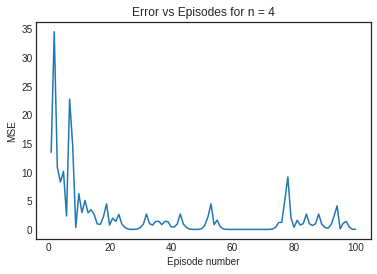

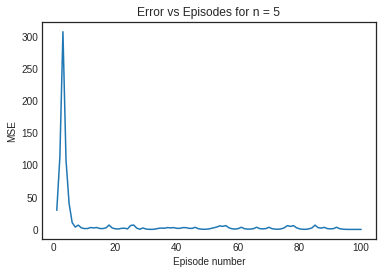

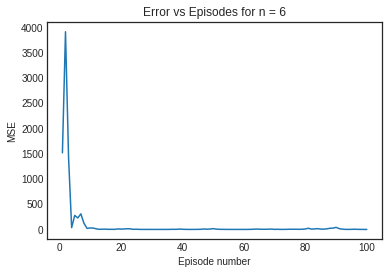

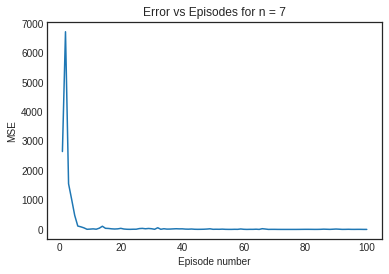

In [7]:
# MSE plot

def error_vs_episodes(n):
    x = np.array([i+1 for i in range(100)])
    y = np.array(converging_iters[n])
    y_est = lowess_bell_shape_kern(x,y,tau=1.5)
    
    error = []
    
    for i in range(100):
        # MSE
        #error.append((y[i] - y_est[i])**2)
        # absolute value
        error.append(np.abs(y[i] - y_est[i]))
    
    plt.title('Error vs Episodes for n = '+str(n))
    plt.plot(x,error)
    plt.xlabel('Episode number')
    plt.ylabel('MSE')
    plt.show()
    
error_vs_episodes(4)
error_vs_episodes(5)
error_vs_episodes(6)
error_vs_episodes(7)

In [8]:
def mse(n):
    x = np.array([i+1 for i in range(100)])
    y = np.array(converging_iters[n])
    y_est = lowess_bell_shape_kern(x,y,tau=1.5)
    
    error = []
    
    for i in range(100):
        # MSE
        error.append((y[i] - y_est[i])**2)
        
    return np.mean(error)
        
def mae(n):
    x = np.array([i+1 for i in range(100)])
    y = np.array(converging_iters[n])
    y_est = lowess_bell_shape_kern(x,y,tau=1.5)
    
    error = []
    
    for i in range(100):
        # MAE
        error.append(np.abs(y[i] - y_est[i]))
        
    return np.mean(error)

In [9]:
for n in range(4,8):
    print(mse(n))

27.631387267080154
1218.9278606758648
198732.04848642074
558654.1010116029


In [10]:
for n in range(4,8):
    print(mae(n))

2.2850586007024383
7.98851574925249
83.08580352579645
136.56325553460894
